# Electric Vehicle Sales Dashboard

### >Imports and Setup for Data Manipulation, Plotting, and Database Connection Display Settings, Warning Suppression, and Visualization Preparation

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import pymysql
import warnings
warnings.filterwarnings("ignore")

### >Connecting to the MySQL Database electricvehicles Using pymysql

In [4]:
df = pymysql.connect(user = 'root', password = 'Fayiz@123', host = 'localhost', database = 'electricvehicles')

### >Importing Data from SQL Tables into Pandas DataFrames for Analysis

In [5]:
dateTable = pd.read_sql("select * from dim_date", df)
electricVehiclesbyMakers = pd.read_sql("select * from electric_vehicle_sales_by_makers", df)
electricVehiclesbyStates = pd.read_sql("select * from electric_vehicle_sales_by_state", df)

### >Data wrangling

displays the first 5 rows of the dateTable DataFrame, giving a quick preview of the data.

In [6]:
dateTable.head()

,date_col,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


provides a summary of the dateTable DataFrame, including the index, column names, data types, and the count of non-null values in each column.

In [7]:
dateTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date_col     36 non-null     object
 1   fiscal_year  36 non-null     int64 
 2   quarter      36 non-null     object
dtypes: int64(1), object(2)
memory usage: 992.0+ bytes


converts date_col column to date

In [9]:
dateTable.rename(columns = {"date_col" : "date"}, inplace = True)

converts the date column in the dateTable DataFrame to a datetime format using the specified format "d-b-y" and then prints the data type of the date column to confirm the conversion.

In [10]:
dateTable.date = pd.to_datetime(dateTable['date'], format = "%d-%b-%y" )
print(dateTable.date.dtype)

datetime64[ns]


generates summary statistics (like count, mean, min, max, etc.) for the numerical columns in the dateTable DataFrame.

In [11]:
dateTable.describe()

,fiscal_year
count,36.000000
mean,2023.000000
std,0.828079
min,2022.000000
25%,2022.000000
50%,2023.000000
75%,2024.000000
max,2024.000000


adds a new column "month no" to the dateTable DataFrame, extracting the month number from the date column using the .dt.month attribute.

In [12]:
dateTable["month no"] = dateTable.date.dt.month

adds a new column "month name" to the dateTable DataFrame, extracting the full month name from the date column and then truncating it to the first three letters (e.g., "Jan", "Feb").

In [13]:
dateTable["month name"] = dateTable.date.dt.month_name().str[:3]

displays the first 5 rows of the dateTable DataFrame, including the newly added "month no" and "month name" columns, for a quick preview.

In [14]:
dateTable.head()

,date,fiscal_year,quarter,month no,month name
0,2021-04-01,2022,Q1,4,Apr
1,2021-05-01,2022,Q1,5,May
2,2021-06-01,2022,Q1,6,Jun
3,2021-07-01,2022,Q2,7,Jul
4,2021-08-01,2022,Q2,8,Aug


returns the dimensions of the electricVehiclesbyMakers DataFrame as a tuple, showing the number of rows and columns.

In [15]:
electricVehiclesbyMakers.shape

(816, 4)

generates summary statistics (like count, mean, min, max, etc.) for the numerical columns in the electricVehiclesbyMakers DataFrame.

In [16]:
electricVehiclesbyMakers.describe()

,electric_vehicles_sold
count,816.000000
mean,2531.998775
std,4771.077333
min,0.000000
25%,42.000000
50%,662.000000
75%,2636.500000
max,44630.000000


displays the first 5 rows of the electricVehiclesbyMakers DataFrame for a quick overview of the data.

In [17]:
electricVehiclesbyMakers.head()

,date_col,vehicle_category,maker,electric_vehicles_sold
0,1-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,1-Apr-22,2-Wheelers,OKAYA EV,0
2,1-May-21,2-Wheelers,OLA ELECTRIC,0
3,1-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,1-Jul-21,2-Wheelers,OLA ELECTRIC,0


renames the column "date_col" to "date" in the electricVehiclesbyMakers DataFrame and modifies the DataFrame in place without creating a copy.

In [19]:
electricVehiclesbyMakers.rename(columns = {"date_col" : "date"}, inplace = True)

provides a summary of the electricVehiclesbyMakers DataFrame, including the column names, data types, non-null counts, and memory usage.

In [20]:
electricVehiclesbyMakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


converts the date column in the electricVehiclesbyMakers DataFrame to a datetime format using the specified date format "%d-%b-%y".

In [21]:
electricVehiclesbyMakers['date'] = pd.to_datetime(electricVehiclesbyMakers.date, format = "%d-%b-%y")

prints the data type of the date column in the electricVehiclesbyMakers DataFrame, confirming whether the conversion to datetime was successful.

In [22]:
print(electricVehiclesbyMakers.date.dtype)

datetime64[ns]


converts all the values in the maker column of the electricVehiclesbyMakers DataFrame to title case (capitalizing the first letter of each word).

In [23]:
electricVehiclesbyMakers.maker = electricVehiclesbyMakers.maker.str.title()

displays the first 5 rows of the electricVehiclesbyMakers DataFrame, showing the updated maker column in title case along with other data.

In [24]:
electricVehiclesbyMakers.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2-Wheelers,Ola Electric,0
1,2022-04-01,2-Wheelers,Okaya Ev,0
2,2021-05-01,2-Wheelers,Ola Electric,0
3,2021-06-01,2-Wheelers,Ola Electric,0
4,2021-07-01,2-Wheelers,Ola Electric,0


returns the number of unique values in the maker column of the electricVehiclesbyMakers DataFrame.

In [26]:
electricVehiclesbyMakers.maker.nunique()

26

iterates over each unique value in the maker column of the electricVehiclesbyMakers DataFrame and prints each value on a new line.

In [27]:
for maker in electricVehiclesbyMakers.maker.unique():
    print(maker, end = "\n")

Ola Electric
Okaya Ev
Byd India
Pca Automobiles
Bmw India
Volvo Auto India
Kia Motors
Mercedes -Benz Ag
Tata Motors
Mg Motor
Mahindra & Mahindra
Hyundai Motor
Hero Electric
Okinawa
Ampere
Ather
Pure Ev
Tvs
Revolt
Bajaj
Being
Jitendra
Others
Bgauss
Battre Electric
Kinetic Green


displays the first 5 rows of the electricVehiclesbyStates DataFrame, providing a preview of its data.

In [28]:
electricVehiclesbyStates.head()

,date_col,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,1-Apr-21,Sikkim,2-Wheelers,0,398
1,1-Apr-21,Sikkim,4-Wheelers,0,361
2,1-May-21,Sikkim,2-Wheelers,0,113
3,1-May-21,Sikkim,4-Wheelers,0,98
4,1-Jun-21,Sikkim,2-Wheelers,0,229


generates summary statistics for the categorical (object) columns in the electricVehiclesbyStates DataFrame, including counts, unique values, top values, and their frequencies.

In [29]:
electricVehiclesbyStates.describe(include = "object")

,date_col,state,vehicle_category
count,2445,2445,2445
unique,36,35,2
top,1-Apr-21,Sikkim,2-Wheelers
freq,68,72,1223


renames the column "date_col" to "date" in the electricVehiclesbyStates DataFrame, modifying it in place.

In [31]:
electricVehiclesbyStates.rename({"date_col" : "date"}, axis = 1, inplace = True)

displays the first 5 rows of the electricVehiclesbyStates DataFrame, providing a preview of its data.

In [32]:
electricVehiclesbyStates.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,1-Apr-21,Sikkim,2-Wheelers,0,398
1,1-Apr-21,Sikkim,4-Wheelers,0,361
2,1-May-21,Sikkim,2-Wheelers,0,113
3,1-May-21,Sikkim,4-Wheelers,0,98
4,1-Jun-21,Sikkim,2-Wheelers,0,229


converts the date column in the electricVehiclesbyStates DataFrame to a datetime format using the specified date format "%d-%b-%y".

In [33]:
electricVehiclesbyStates.date = pd.to_datetime(electricVehiclesbyStates.date, format = "%d-%b-%y")

prints the data type of the date column in the electricVehiclesbyStates DataFrame, confirming the conversion to datetime.

In [34]:
print(electricVehiclesbyStates.date.dtype)

datetime64[ns]


returns the number of unique values in the state column of the electricVehiclesbyStates DataFrame.

In [35]:
electricVehiclesbyStates.state.nunique()

35

iterates over each unique value in the state column of the electricVehiclesbyStates DataFrame and prints each state on a new line.

In [36]:
for state in electricVehiclesbyStates.state.unique():
    print(state, end = "\n")

Sikkim
Andaman & Nicobar Island
Arunachal Pradesh
Assam
Chhattisgarh
DNH and DD
Jammu and Kashmir
Ladakh
Manipur
Meghalaya
Mizoram
Nagaland
Puducherry
Tripura
Bihar
Chandigarh
Delhi
Madhya Pradesh
Odisha
Punjab
Uttarakhand
Himachal Pradesh
Andaman & Nicobar
Haryana
Jharkhand
Andhra Pradesh
Goa
Gujarat
Karnataka
Kerala
Maharashtra
Rajasthan
Tamil Nadu
Uttar Pradesh
West Bengal


replaces occurrences of "Andaman & Nicobar Island" with "Andaman & Nicobar" in the state column of the electricVehiclesbyStates DataFrame, modifying it in place.

In [37]:
electricVehiclesbyStates.state.replace({"Andaman & Nicobar Island" : "Andaman & Nicobar"}, inplace = True)

returns the number of unique values in the state column of the electricVehiclesbyStates DataFrame, reflecting any changes made to the column.

In [38]:
electricVehiclesbyStates.state.nunique()

34

## >EDA

In [39]:
# Calculate total vehicles sold in millions
totalVehiclesSold = round(electricVehiclesbyStates.total_vehicles_sold.sum() / 1_000_000, 2)

# Calculate total electric vehicles sold in millions
electricVehiclesSold = round(electricVehiclesbyMakers.electric_vehicles_sold.sum() / 1_000_000, 2)

# Calculate EV penetration rate
evPenetrationRate = round(electricVehiclesSold / totalVehiclesSold * 100, 2)

# Print results with formatting
print("\033[1m Total Vehicles Sold:\033[0m {}M".format(totalVehiclesSold))
print("\033[1m Total Electric Vehicles Sold:\033[0m {}M".format(electricVehiclesSold))
print("\033[1m EV Penetration Rate:\033[0m {}%".format(evPenetrationRate))


 Total Vehicles Sold: 57.22M
 Total Electric Vehicles Sold: 2.07M
 EV Penetration Rate: 3.62%


performs an inner join between dateTable and electricVehiclesbyStates DataFrames on the common column date. The resulting dateStatesTable will contain only the rows where the date values match in both tables.

In [40]:
dateStatesTable = dateTable.merge(electricVehiclesbyStates, on = 'date', how = "inner")

performs an inner join between dateTable and electricVehiclesbyMakers DataFrames on the common column date. The resulting dateMakersTable will contain only the rows where the date values match in both tables.









In [42]:
dateMakersTable = dateTable.merge(electricVehiclesbyMakers, on = 'date', how = "inner")

displays the first 5 rows of the dateStatesTable DataFrame, allowing you to preview the merged data from dateTable and electricVehiclesbyStates.

In [44]:
dateStatesTable.head()

,date,fiscal_year,quarter,month no,month name,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,2021-04-01,2022,Q1,4,Apr,Sikkim,2-Wheelers,0,398
1,2021-04-01,2022,Q1,4,Apr,Sikkim,4-Wheelers,0,361
2,2021-04-01,2022,Q1,4,Apr,Andaman & Nicobar,2-Wheelers,0,515
3,2021-04-01,2022,Q1,4,Apr,Arunachal Pradesh,2-Wheelers,0,1256
4,2021-04-01,2022,Q1,4,Apr,Arunachal Pradesh,4-Wheelers,0,724


Groups the data by month number and name, sums the total vehicles sold for each month, and sorts the results by month number.

In [45]:
EVsSoldbyMonth = dateStatesTable.groupby(["month no", "month name"])["total_vehicles_sold"].sum().reset_index().sort_values("month no")

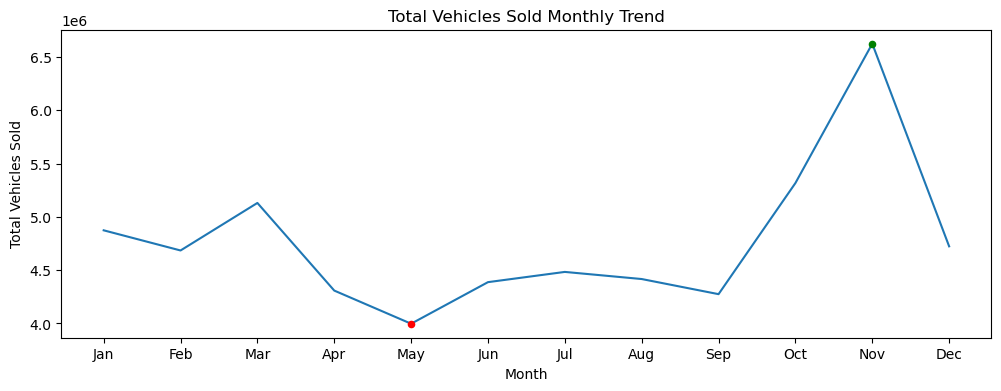

In [46]:
maxValue = EVsSoldbyMonth["total_vehicles_sold"].max()
maxMonth = EVsSoldbyMonth[EVsSoldbyMonth["total_vehicles_sold"] == maxValue]["month name"].values[0]
minValue = EVsSoldbyMonth["total_vehicles_sold"].min()
minMonth = EVsSoldbyMonth[EVsSoldbyMonth["total_vehicles_sold"] == minValue]["month name"].values[0]


plt.figure(figsize = (12, 4))

plt.plot(EVsSoldbyMonth["month name"], EVsSoldbyMonth["total_vehicles_sold"])
plt.scatter(maxMonth, maxValue, marker = "o", s = 20, color = 'green', zorder = 2, label = "Max Value")
plt.scatter(minMonth, minValue, marker = "o", s = 20, color = 'red', zorder = 2, label = "Max Value")

plt.xlabel("Month")
plt.ylabel("Total Vehicles Sold")
plt.title("Total Vehicles Sold Monthly Trend")
plt.show()

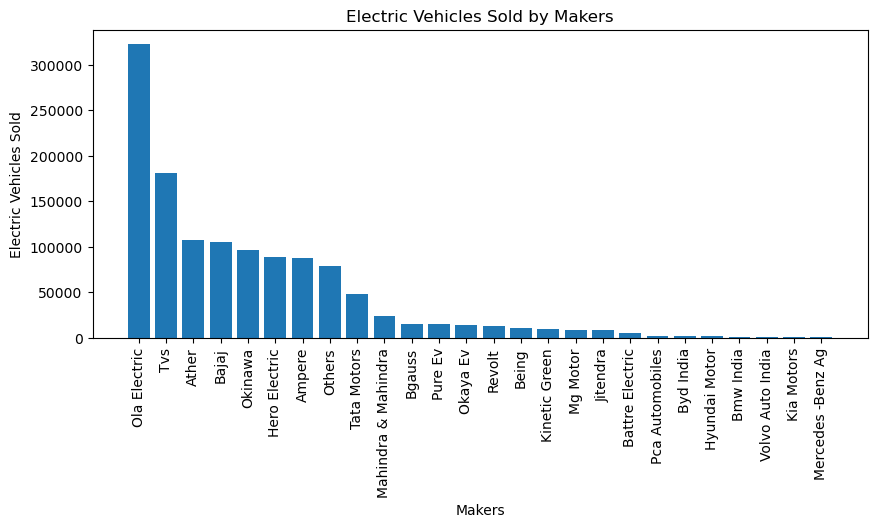

In [47]:
EVsSoldbyMakers = dateMakersTable.groupby(["fiscal_year", "maker", "vehicle_category"])["electric_vehicles_sold"].sum().reset_index().sort_values("electric_vehicles_sold", ascending = False)

plt.figure(figsize = (10, 4))
plt.bar(EVsSoldbyMakers['maker'],EVsSoldbyMakers['electric_vehicles_sold'])
plt.xticks(rotation = 90)
plt.xlabel("Makers")
plt.ylabel("Electric Vehicles Sold")
plt.title("Electric Vehicles Sold by Makers")
plt.show()

## Primary Questions

1. List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold.

In [49]:
EVsSoldFY = EVsSoldbyMakers.pivot(columns = ['fiscal_year', 'vehicle_category'], index = 'maker', values = "electric_vehicles_sold")

print("\033[1m Top 3 makers for fiscal year 2023(2-Wheelers)\033[0m:")
print(EVsSoldFY[(2023, "2-Wheelers")].sort_values(ascending = False).head(3).reset_index())

print("\n\033[1m Top 3 makers for fiscal year 2024(2-Wheelers)\033[0m:")
print(EVsSoldFY[(2024, "2-Wheelers")].sort_values(ascending = False).head(3).reset_index())

print("\n\033[1m Bottom 3 makers for fiscal year 2023(2-Wheelers)\033[0m:")
print(EVsSoldFY[(2023, "2-Wheelers")].sort_values().head(3).reset_index())

print("\n\033[1m Bottom 3 makers for fiscal year 2024(2-Wheelers)\033[0m:")
print(EVsSoldFY[(2024, "2-Wheelers")].sort_values().head(3).reset_index())

 Top 3 makers for fiscal year 2023(2-Wheelers):
           maker       2023
                 2-Wheelers
0   Ola Electric   152583.0
1        Okinawa    96945.0
2  Hero Electric    88993.0

 Top 3 makers for fiscal year 2024(2-Wheelers):
          maker       2024
                2-Wheelers
0  Ola Electric   322489.0
1           Tvs   180743.0
2         Ather   107552.0

 Bottom 3 makers for fiscal year 2023(2-Wheelers):
      maker       2023
            2-Wheelers
0  Jitendra     8563.0
1     Being    11018.0
2   Pure Ev    11556.0

 Bottom 3 makers for fiscal year 2024(2-Wheelers):
             maker       2024
                   2-Wheelers
0  Battre Electric     4841.0
1           Revolt     7254.0
2    Kinetic Green     9585.0


2. Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024.

In [51]:
statesPivot = dateStatesTable.groupby(['fiscal_year', 'state', 'vehicle_category'])[["electric_vehicles_sold", "total_vehicles_sold"]].sum().reset_index()

In [54]:
statesPivot["ev_penetration"] = round((statesPivot.electric_vehicles_sold/ statesPivot.total_vehicles_sold) * 100, 2)

In [56]:
print("\033[1m Top 5 states with the highest penetration rate in 2-wheeler in FY 2024\033[0m:")
print(statesPivot[statesPivot['fiscal_year'] == 2024].query("vehicle_category == '2-Wheelers'").reset_index()[['state', 'ev_penetration']].sort_values(by = "ev_penetration", ascending = False).head(5))

print("\n\033[1m Top 5 states with the highest penetration rate in 4-wheeler in FY 2024\033[0m:")
print(statesPivot[statesPivot['fiscal_year'] == 2024].query("vehicle_category == '4-Wheelers'").reset_index()[['state', 'ev_penetration']].sort_values(by = "ev_penetration", ascending = False).head(5))

 Top 5 states with the highest penetration rate in 2-wheeler in FY 2024:
          state  ev_penetration
9           Goa           17.99
16       Kerala           13.52
15    Karnataka           11.57
19  Maharashtra           10.07
8         Delhi            9.40

 Top 5 states with the highest penetration rate in 4-wheeler in FY 2024:
         state  ev_penetration
16      Kerala            5.76
5   Chandigarh            4.50
8        Delhi            4.29
15   Karnataka            4.26
9          Goa            4.25


3. List the states with negative penetration (decline) in EV sales from 2022 to 2024?

In [57]:
statesEVPivot = statesPivot.pivot_table(index = 'state', columns = 'fiscal_year', values = 'ev_penetration').reset_index()
statesEVPivotFiltered = statesEVPivot[['state', 2022, 2024]]
statesEVPivotFiltered["EVPenetrationDifference"] = round(statesEVPivotFiltered[2024] - statesEVPivotFiltered[2022], 2)

statesEVPivotFiltered[statesEVPivotFiltered["EVPenetrationDifference"] < 0]

fiscal_year,state,2022,2024,EVPenetrationDifference
0,Andaman & Nicobar,0.94,0.575,-0.36
17,Ladakh,2.24,2.030,-0.21


4. What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024?

Top 5 Makers(4-Wheelers): 
Tata Motors
Mahindra & Mahindra
Mg Motor
Byd India
Hyundai Motor




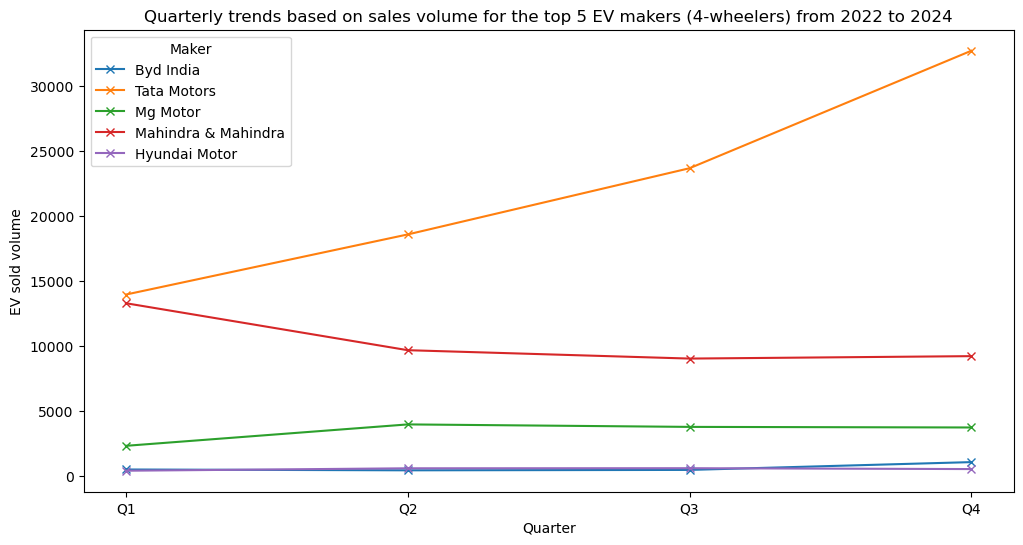

In [58]:
Top5EVMakers = dateMakersTable[dateMakersTable['vehicle_category'] == "4-Wheelers"].groupby('maker')['electric_vehicles_sold'].sum().sort_values(ascending = False).head().reset_index()
dateMakersFiltered = dateMakersTable[dateMakersTable["maker"].isin(Top5EVMakers['maker'])]

print("\033[1mTop 5 Makers(4-Wheelers): \033[0m")
for maker in Top5EVMakers['maker']:
    print(maker)

print("\n")

dateMakersFilteredPivot = dateMakersFiltered.groupby(['maker', "quarter"])['electric_vehicles_sold'].sum().reset_index()

makers = dateMakersFiltered['maker'].unique()

plt.figure(figsize = (12, 6))
for maker in makers:
    subset = dateMakersFilteredPivot[dateMakersFilteredPivot['maker'] == maker]
    plt.plot(subset["quarter"], subset['electric_vehicles_sold'], marker = 'x', label = maker)

plt.xlabel("Quarter")
plt.ylabel("EV sold volume")
plt.legend(title = "Maker")
plt.title("Quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024")
plt.show()

5. How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024?

In [59]:
print("\033[1mEV Sales & Penetration Rate(Delhi vs Karnataka)\033[0m\n")
statesPivotDK = dateStatesTable.query("fiscal_year == 2024")[dateStatesTable["state"].isin(['Delhi', 'Karnataka'])].groupby('state')[["electric_vehicles_sold", "total_vehicles_sold"]].sum().reset_index()
statesPivotDK['ev_penetration'] = round((statesPivotDK['electric_vehicles_sold']/ statesPivotDK['total_vehicles_sold']) * 100, 2).astype(str) + "%"
statesPivotDK

EV Sales & Penetration Rate(Delhi vs Karnataka)



,state,electric_vehicles_sold,total_vehicles_sold,ev_penetration
0,Delhi,46724,606348,7.71%
1,Karnataka,160989,1581988,10.18%


6. List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.

In [60]:
fourWheelersTable = dateMakersTable.query("vehicle_category == '4-Wheelers'")
fourWheelerstopfive = fourWheelersTable.groupby('maker')['electric_vehicles_sold'].sum().sort_values(ascending = False).reset_index().head()
filtered = fourWheelersTable[fourWheelersTable['maker'].isin(fourWheelerstopfive.maker)]


beginingValue = filtered.query("fiscal_year == 2022").groupby('maker')['electric_vehicles_sold'].sum()
endingValue = filtered.query("fiscal_year == 2024").groupby('maker')['electric_vehicles_sold'].sum()

CAGRtopFive = round((((endingValue/ beginingValue) ** (1/ (2024 - 2022))) - 1) * 100, 2).astype(str) + "%"

print("\033[1mCAGR for top 5 makers(4-Wheelers):\033[0m\n")
print(CAGRtopFive.reset_index())

CAGR for top 5 makers(4-Wheelers):

                 maker electric_vehicles_sold
0            Byd India                566.52%
1        Hyundai Motor                255.48%
2  Mahindra & Mahindra                140.33%
3             Mg Motor                131.53%
4          Tata Motors                 94.71%


7. List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.

In [61]:
beginingValueTV = dateStatesTable[dateStatesTable["fiscal_year"] == 2022].groupby('state')['total_vehicles_sold'].sum()
endingValueTV = dateStatesTable[dateStatesTable["fiscal_year"] == 2024].groupby('state')['total_vehicles_sold'].sum()

CAGR = round((((endingValueTV/ beginingValueTV) ** (1/ (2024 - 2022))) - 1) * 100, 2).sort_values(ascending = False).reset_index().rename(columns = {'total_vehicles_sold' : 'CAGR'})
print("\033[1mTop 10 states with highest CAGR in total Vehicles Sold:\033[0m\n")
print(CAGR.head(10))

Top 10 states with highest CAGR in total Vehicles Sold:

               state   CAGR
0          Meghalaya  28.47
1                Goa  27.41
2          Karnataka  25.28
3              Delhi  22.88
4          Rajasthan  21.50
5            Gujarat  20.55
6              Assam  20.13
7            Mizoram  18.77
8  Arunachal Pradesh  18.30
9  Andaman & Nicobar  18.29


8. What are the peak and low season months for EV sales based on the data from 2022 to 2024?

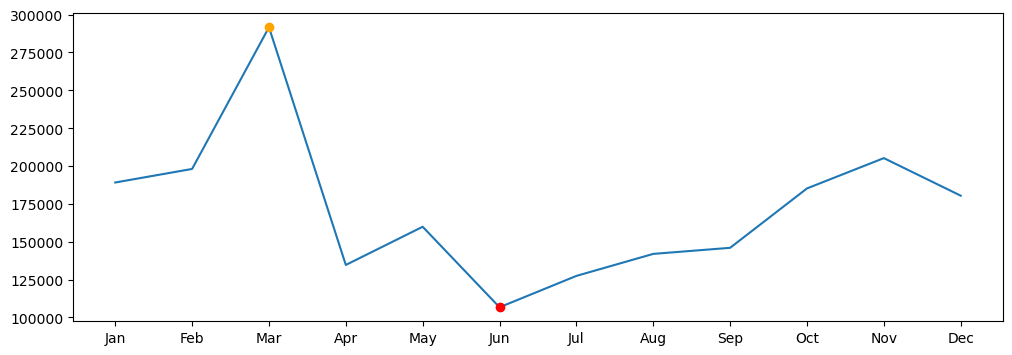

In [62]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dateStatesTable['month name'] = pd.Categorical(dateStatesTable['month name'], categories = month_order, ordered = True)

EVsSoldbyMonth = dateStatesTable.groupby('month name')['electric_vehicles_sold'].sum().reset_index()
EVsSoldbyMonth['month name'] = pd.Categorical(EVsSoldbyMonth['month name'], categories = month_order, ordered = True)

maxValueEV = EVsSoldbyMonth['electric_vehicles_sold'].max()
maxMonthEV = EVsSoldbyMonth[EVsSoldbyMonth['electric_vehicles_sold'] == maxValueEV]['month name'].values[0]

minValueEV = EVsSoldbyMonth['electric_vehicles_sold'].min()
minMonthEV = EVsSoldbyMonth[EVsSoldbyMonth['electric_vehicles_sold'] == minValueEV].min().values[0]



plt.figure(figsize = (12, 4))
plt.plot(EVsSoldbyMonth['month name'], EVsSoldbyMonth['electric_vehicles_sold'])
plt.scatter(maxMonthEV, maxValueEV, color = 'orange', zorder = 2)
plt.scatter(minMonthEV, minValueEV, color = 'red', zorder = 2)
plt.show()

9. What is the projected number of EV sales (including 2-wheelers and 4-wheelers) for the top 10 states by penetration rate in 2030, based on the compounded annual growth rate (CAGR) from previous years?

In [63]:
# Projected EV Sales 

top10StatesbyEVPenetration = statesPivot.groupby('state')['ev_penetration'].sum().sort_values(ascending = False).head(10).reset_index()

beginingValueEVSales = dateStatesTable.query('fiscal_year == 2022')[dateStatesTable['state'].isin(top10StatesbyEVPenetration.state)].groupby('state')['electric_vehicles_sold'].sum().reset_index()
endingValueEVSales = dateStatesTable.query('fiscal_year == 2024')[dateStatesTable['state'].isin(top10StatesbyEVPenetration.state)].groupby('state')['electric_vehicles_sold'].sum().reset_index()
endingValueEVSales['CAGREVSales'] = round((((endingValueEVSales['electric_vehicles_sold']/ beginingValueEVSales['electric_vehicles_sold']) ** (1/ (2024 - 2022))) - 1) * 100, 2)
endingValueEVSales['projesctedEVSales'] = round(endingValueEVSales['electric_vehicles_sold'] * ((endingValueEVSales['CAGREVSales'] / 100) + 1) ** 6, 0)

print("\033[1mProjected EV Sales in 2030\033[0m\n")
endingValueEVSales.sort_values(by = 'projesctedEVSales', ascending = False)

Projected EV Sales in 2030



,state,electric_vehicles_sold,CAGREVSales,projesctedEVSales
6,Maharashtra,197169,101.89,13351421.0
5,Kerala,73938,132.83,11778808.0
3,Gujarat,84359,116.33,8646332.0
4,Karnataka,160989,93.24,8382593.0
7,Odisha,39118,102.94,2732641.0
2,Goa,10799,146.45,2419672.0
8,Rajasthan,66444,81.87,2404486.0
9,Tamil Nadu,94314,59.95,1579362.0
1,Delhi,46724,68.10,1054257.0
0,Chandigarh,2877,164.58,986920.0


10. Estimate the revenue growth rate of 4-wheeler and 2-wheelers EVs in India for 2022 vs 2024 and 2023 vs 2024, assuming an average unit price.

In [64]:
# 2-Wheeler 
Revenue2024 = dateStatesTable.query('fiscal_year == 2024')[dateStatesTable['vehicle_category'] == '2-Wheelers']['electric_vehicles_sold'].sum() * 85000
Revenue2023 = dateStatesTable.query('fiscal_year == 2023')[dateStatesTable['vehicle_category'] == '2-Wheelers']['electric_vehicles_sold'].sum() * 85000
Revenue2022 = dateStatesTable.query('fiscal_year == 2022')[dateStatesTable['vehicle_category'] == '2-Wheelers']['electric_vehicles_sold'].sum() * 85000

print("\033[1m2-Wheeler Growth Rate\033[0m")
print("\n\033[1m2022 vs 2024\033[0m")
print(round(((Revenue2024 - Revenue2022)/ Revenue2022) * 100, 2).astype(str) + "%")

print("\n\033[1m2023 vs 2024\033[0m")
print(round(((Revenue2024 - Revenue2023)/ Revenue2023) * 100, 2).astype(str) + "%")


# 4-Wheeler 
FRevenue2024 = dateStatesTable.query('fiscal_year == 2024')[dateStatesTable['vehicle_category'] == '4-Wheelers']['electric_vehicles_sold'].sum() * 1500000
FRevenue2023 = dateStatesTable.query('fiscal_year == 2023')[dateStatesTable['vehicle_category'] == '4-Wheelers']['electric_vehicles_sold'].sum() * 1500000
FRevenue2022 = dateStatesTable.query('fiscal_year == 2022')[dateStatesTable['vehicle_category'] == '4-Wheelers']['electric_vehicles_sold'].sum() * 1500000

print("\n\033[1m4-Wheeler Growth Rate\033[0m")
print("\n\033[1m2022 vs 2024\033[0m")
print(round(((FRevenue2024 - FRevenue2022)/ FRevenue2022) * 100, 2).astype(str) + "%")

print("\n\033[1m2023 vs 2024\033[0m")
print(round(((FRevenue2024 - FRevenue2023)/ FRevenue2023) * 100, 2).astype(str) + "%")

2-Wheeler Growth Rate

2022 vs 2024
269.28%

2023 vs 2024
28.13%

4-Wheeler Growth Rate

2022 vs 2024
367.79%

2023 vs 2024
83.08%
